<a href="https://colab.research.google.com/github/veera9784/play-store-app-review-analysis/blob/main/Copy_of_hotel_booking_eda_and_cancel_prediction_30mar2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#here we are importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the csv file
df=pd.read_csv("hotel_bookings.csv")

In [ ]:
#to see top five columns
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# to check no of rows and columns
df.shape

(119390, 32)

In [ ]:
# to know the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#describe is used to know the descriptive stastitcs 
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# here we are making the copy of dataframe
df1=df.copy()

EDA 

In [ ]:
#checking missing values
df1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Company column has 94 % and agent has 13 % missing values, its better to drop it rather than treating them
df1.drop(['agent','company'],axis=1,inplace=True)


In [ ]:
df1['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
df1['children'].mode()

0    0.0
Name: children, dtype: float64

In [ ]:

# here we are filling the country with not known and children with mode that is 0
nan_replacements={'country':"not known","children":0}
df1=df1.fillna(nan_replacements)

In [ ]:
# here we can see data is cleaned
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
# counts unique values here '0' is not cancelled and '1' is cancelled
df1['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

<Axes: xlabel='is_canceled', ylabel='count'>

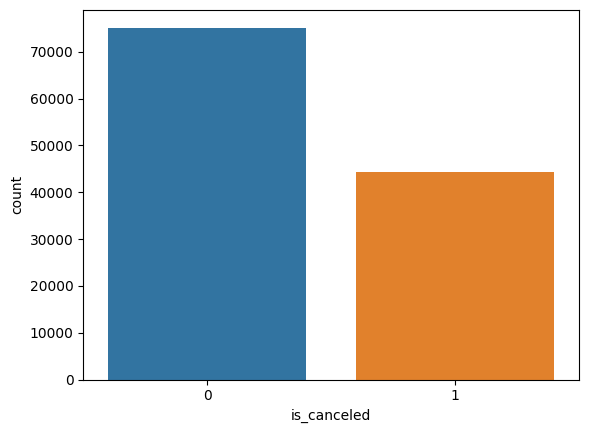

In [ ]:
sns.countplot(x='is_canceled',data=df1)


In [ ]:
#Data is belong to 2015, 2016 and 2017, in 2016 number of bookings were more compare to other two years
df1.arrival_date_year.value_counts()


2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [ ]:
#here we are checking the unique values of dataframe (unique means different categories in that column)
df1.nunique()


hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
days_in_waiting_list               128
customer_type                        4
adr                      

<Axes: xlabel='hotel', ylabel='count'>

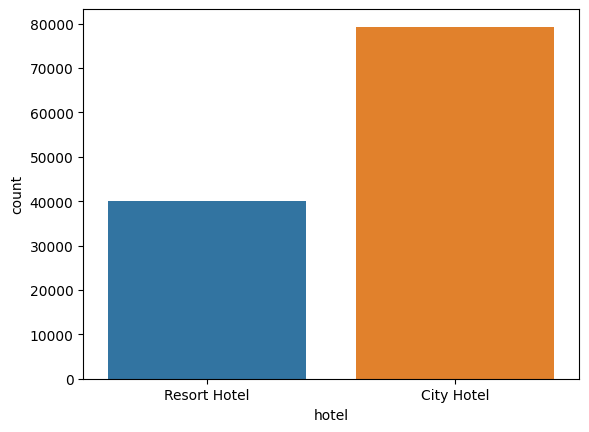

In [ ]:
# here we can see city hotel has more bookings comparing to the city hotel
sns.countplot(x = 'hotel', data = df1)


<Axes: xlabel='is_canceled', ylabel='count'>

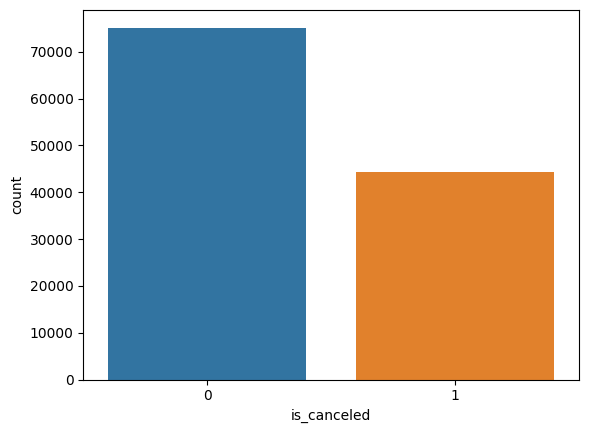

In [ ]:
sns.countplot(x = 'is_canceled', data = df1)

In [ ]:
#most of the bookigs were not cancelled, around 40000 bookings were cancelled which is around 37 % of the total bookings
len(df1[df1.is_canceled == 1])/len(df1)


0.37041628277075134

<Axes: xlabel='hotel', ylabel='count'>

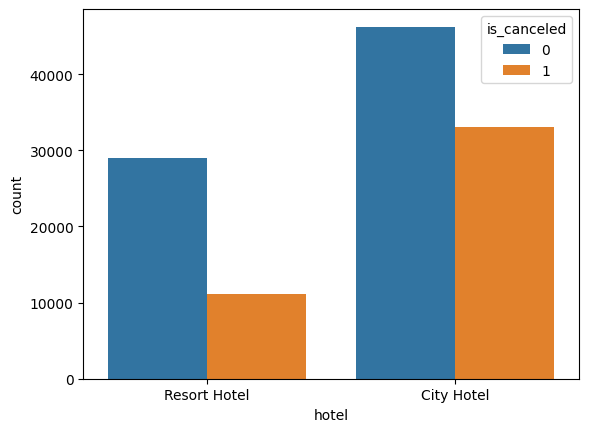

In [ ]:
#Lets see cancellation split between type of hotels
#most of the bookings happening in city hotel and cancellation is also high
sns.countplot(x = 'hotel',hue = 'is_canceled', data = df1)

<Axes: xlabel='arrival_date_year', ylabel='count'>

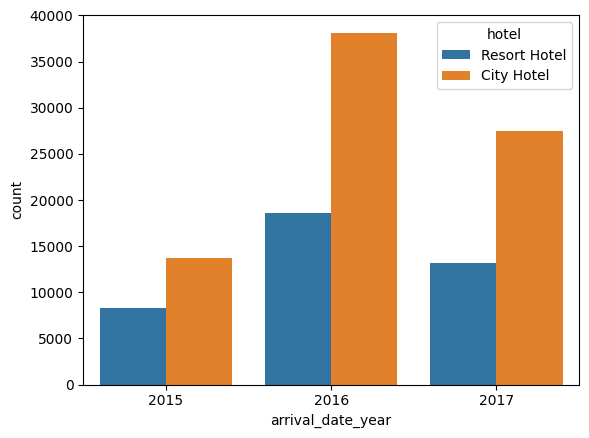

In [ ]:
#across the years trend remain same - city hotel has the major share holder in bookings, but in 2017 bookings has dropped in both the hotel types
sns.countplot(x = 'arrival_date_year', data = df1, hue = 'hotel')


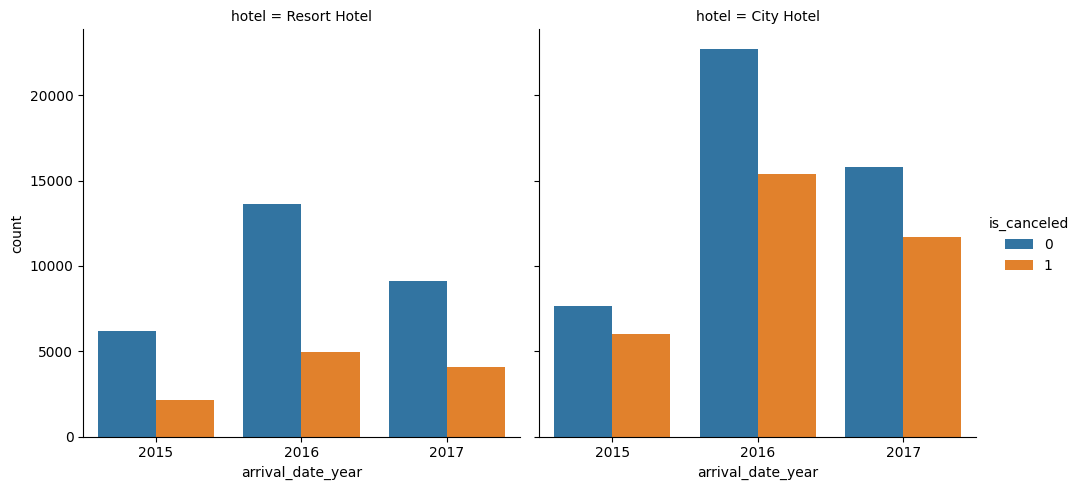

In [ ]:
#this gives comparative view of type of hotel booked over the years and cancellation status
#catplot is for creating categoricqal columns.
#categorical plot shows relation between categorical variable and numerical variable
sns.catplot(x ="arrival_date_year", hue="is_canceled", col="hotel", data = df, kind="count")
plt.show()

In [ ]:
 #aggregation function is applied to each group to count the number of occurrences of each hotel.
df_year = df1.groupby(['arrival_date_month']).agg({'hotel':'count'}).reset_index()
df_year


,arrival_date_month,hotel
0,April,11089
1,August,13877
2,December,6780
3,February,8068
4,January,5929
5,July,12661
6,June,10939
7,March,9794
8,May,11791
9,November,6794


<function matplotlib.pyplot.show(close=None, block=None)>

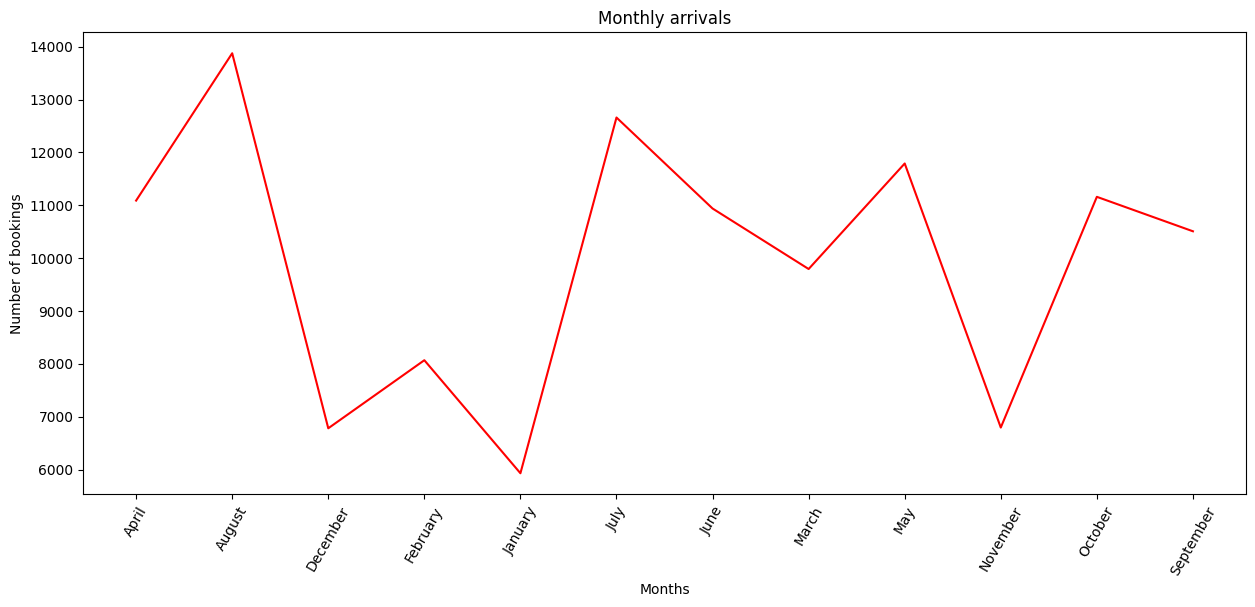

In [ ]:
#across the years, July and August are the months with high number of bookings
df_year = df1.groupby(['arrival_date_month']).agg({'hotel':'count'}).reset_index()

plt.figure(figsize=(15,6))
sns.lineplot(x = "arrival_date_month",y = 'hotel', data = df_year, color = 'red' )
plt.xticks(rotation = 60)
plt.title('Monthly arrivals', )
plt.xlabel('Months')
plt.ylabel('Number of bookings')
plt.show

Text(0.5, 1.0, 'monthly arrivals actross the months and hotel type ')

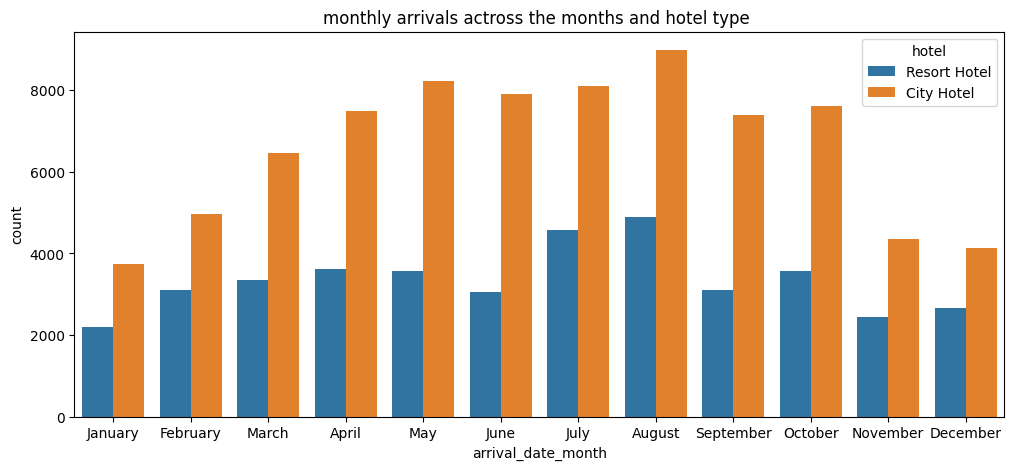

In [ ]:
fig = plt.figure(figsize = (12,5))
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

sns.countplot(data = df1,x = 'arrival_date_month',hue = 'hotel',order=months)
plt.title('monthly arrivals actross the months and hotel type ')

In [ ]:
df1['total_nights'] = df1['stays_in_week_nights'] + df1['stays_in_weekend_nights']


In [ ]:
# so is cancelled = 0 means the confirmed bookings
bookings_confirmed = df1[df1['is_canceled'] == 0]


Text(0, 0.5, 'No. of bookings')

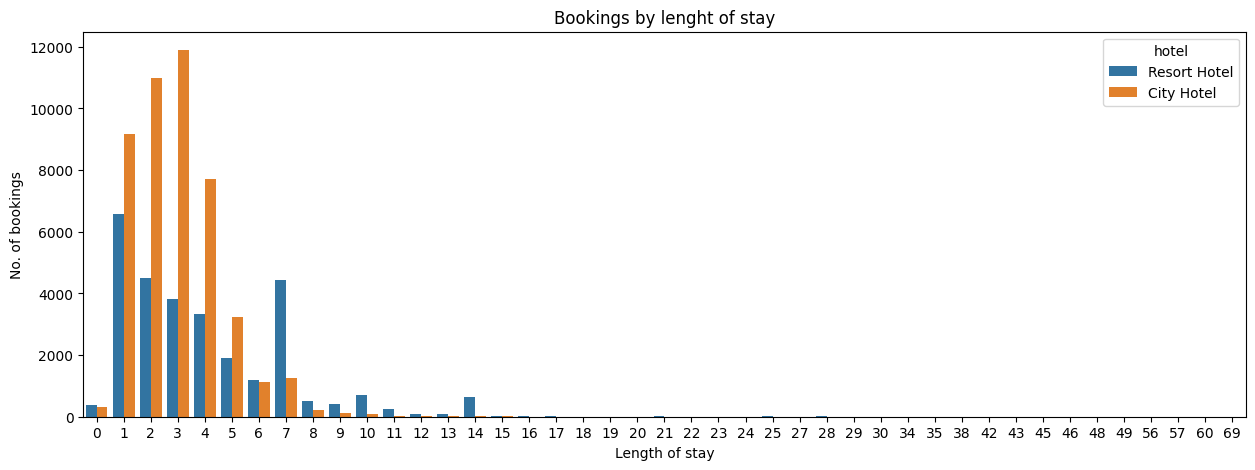

In [ ]:
#Most of the bookings are for 1 to 4 days for the city hotel and 1 and 7 days for resort hotel
fig = plt.figure(figsize = (15,5))
sns.countplot(x = 'total_nights', data = bookings_confirmed, hue = 'hotel')
plt.title('Bookings by lenght of stay')
plt.xlabel('Length of stay')
plt.ylabel('No. of bookings')

In [ ]:
#ascending =false for descending aggregation function is applied to each group to count the number of occurrences of each hotel.
df_country = bookings_confirmed.groupby(['country']).agg({'hotel':'count'}).reset_index().sort_values(by=['hotel'],ascending=False)[:10]
df_country

,country,hotel
125,PRT,21071
57,GBR,9676
54,FRA,8481
50,ESP,6391
42,DEU,6069
70,IRL,2543
75,ITA,2433
15,BEL,1868
113,NLD,1717
158,USA,1596


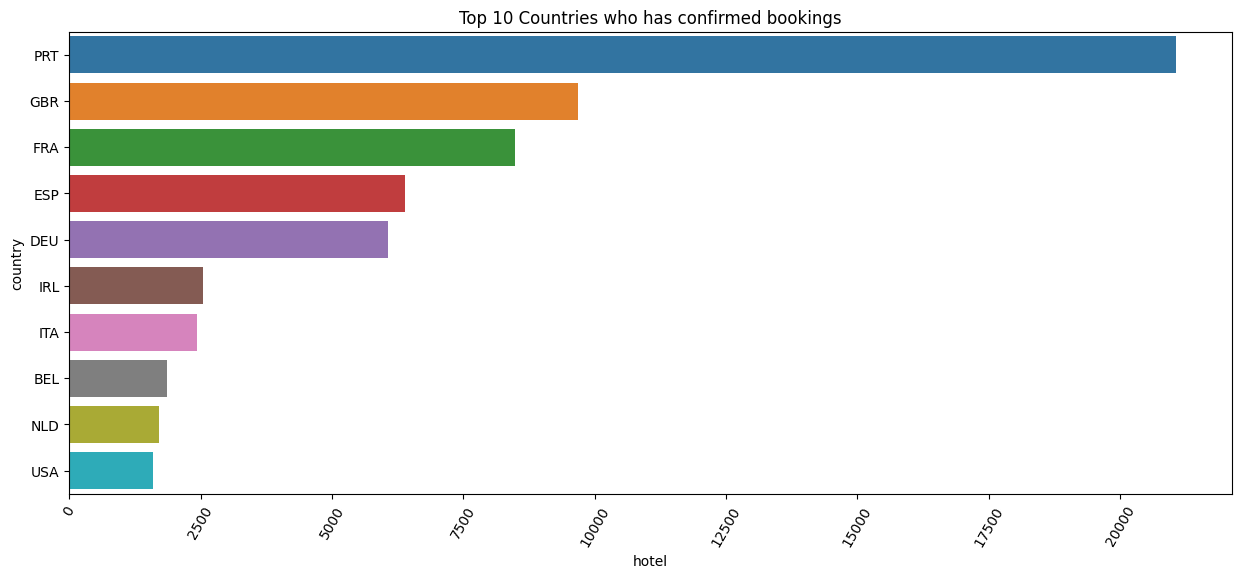

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y = "country",x = 'hotel', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries who has confirmed bookings')
plt.show()

<Figure size 1500x600 with 0 Axes>

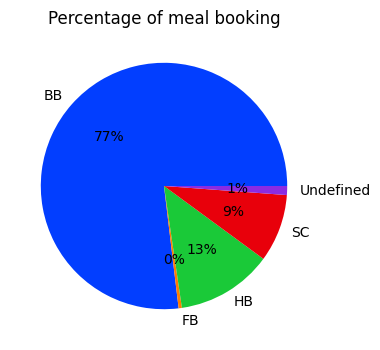

In [ ]:
#most of the visitors prefer bed & breakfast (BB) followed by full board (FB), half board (HB) and self cater (SC)
plt.figure(figsize=(15,6))
df_pie = bookings_confirmed.groupby(['meal']).agg({'hotel':'count'}).reset_index()
colors = sns.color_palette('bright')[0:5]
plt.figure(figsize=(10,4))

plt.pie(df_pie['hotel'], labels = df_pie.meal , colors = colors,autopct='%.0f%%')
plt.title('Percentage of meal booking')
plt.show()

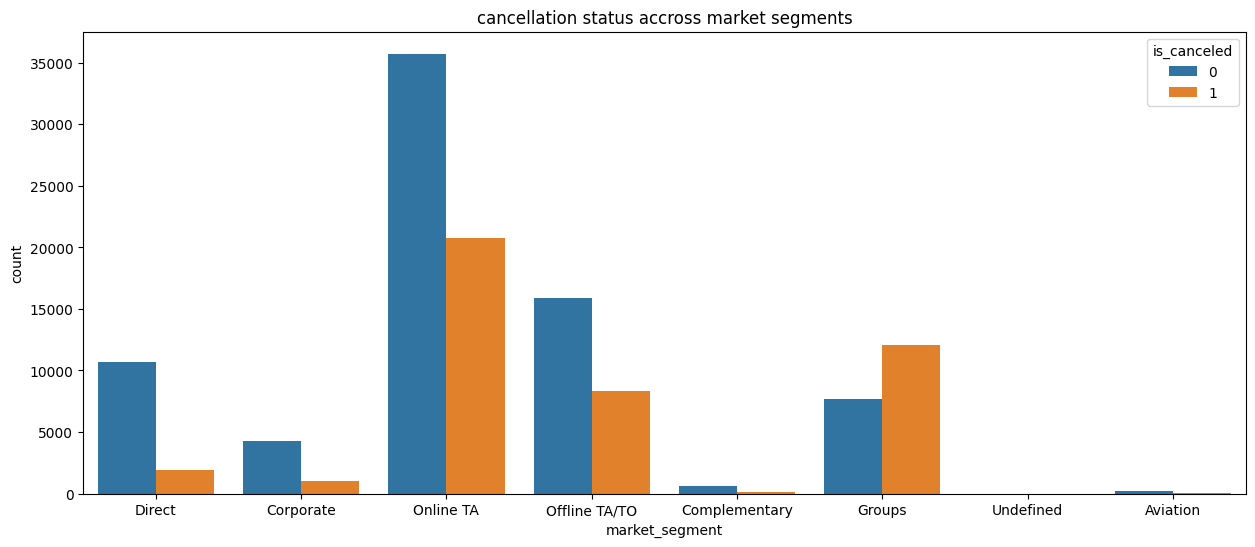

In [ ]:
#most of the cancellations accounting to online TA and Groups
plt.figure(figsize=(15,6))
sns.countplot(x = 'market_segment',data = df1, hue='is_canceled')
plt.title('cancellation status accross market segments')
plt.show()

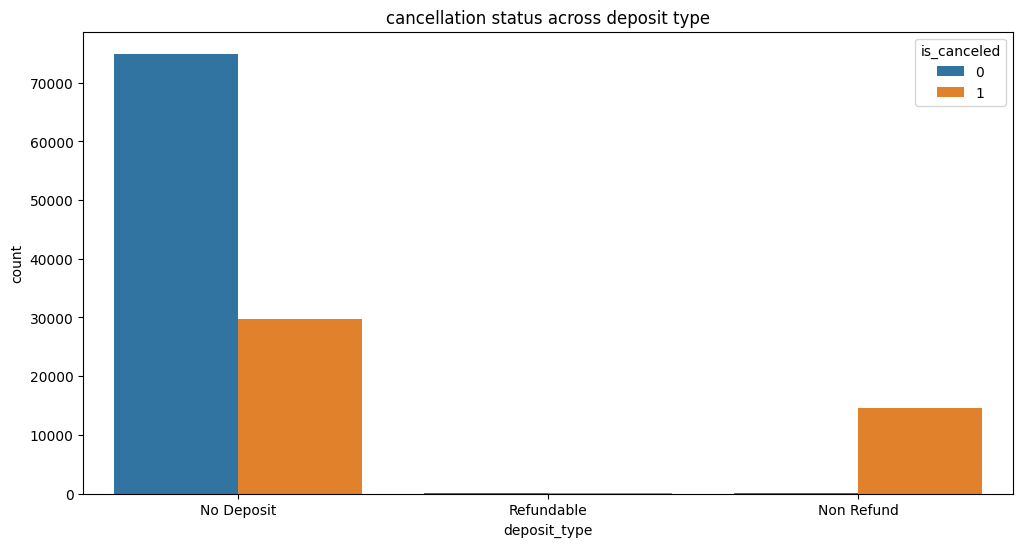

In [ ]:
#most of the bookings dont have mandaotory deposit, cancellations were also high here
plt.figure(figsize=(12,6))
sns.countplot(x = 'deposit_type',data = df1, hue='is_canceled')
plt.title('cancellation status across deposit type')
plt.show()

Text(0.5, 1.0, 'total nights across months')

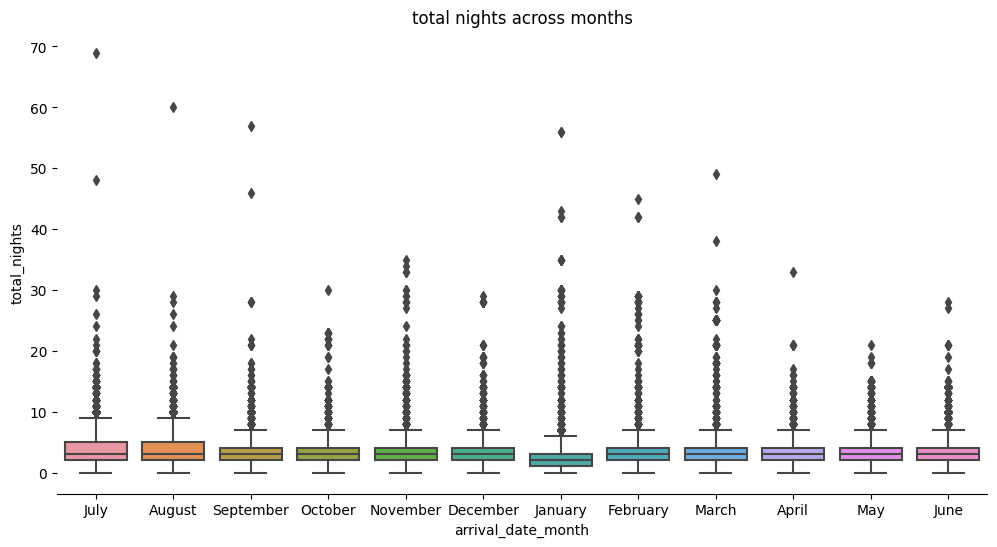

In [ ]:
#across all the months total nights Distribution has more or less same, but there were lot of outliers across the months
plt.figure(figsize=(12,6))
sns.boxplot(x='arrival_date_month', y='total_nights', data=df1, )
sns.despine(left=True)
plt.title('total nights across months')

<Axes: >

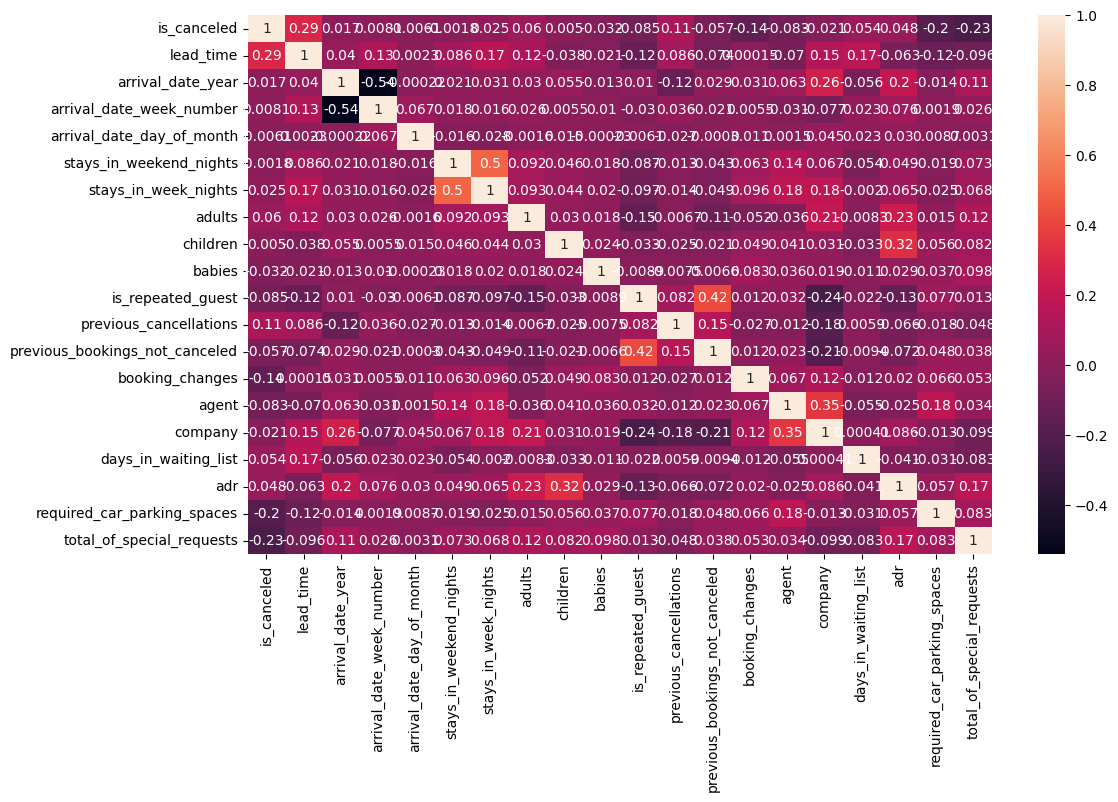

In [ ]:
#there is a high correlation between 3 columns week nights, weekend nights and total nights, will drop first two columns
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot = True)

In [ ]:

df_ = df.drop(['meal','country','reserved_room_type','assigned_room_type','deposit_type','stays_in_weekend_nights',
       'stays_in_week_nights','reservation_status','reservation_status_date'], axis=1)

In [ ]:
## dropping unwanted columns and creating dummy variables for categorical variables

df_ = df1.drop(['meal','country','reserved_room_type','assigned_room_type','deposit_type','stays_in_weekend_nights',
       'stays_in_week_nights','reservation_status','reservation_status_date'], axis=1)

df_ = pd.concat([df_, 
                 pd.get_dummies(df_['hotel'], drop_first=True), 
                 pd.get_dummies(df_['arrival_date_month'], drop_first=True), 
                 pd.get_dummies(df_['market_segment'], drop_first=True),
                 pd.get_dummies(df_['distribution_channel'], drop_first=True),
                 pd.get_dummies(df_['customer_type'], drop_first=True)
                 ], axis=1)

df_ = df_.drop(['hotel','arrival_date_month','market_segment','distribution_channel','customer_type'], axis=1)

In [ ]:
df_

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,...,Offline TA/TO,Online TA,Undefined,Direct,GDS,TA/TO,Undefined,Group,Transient,Transient-Party
0,0,342,2015,27,1,2,0.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,2015,27,1,2,0.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,2015,27,1,1,0.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,2015,27,1,1,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,14,2015,27,1,2,0.0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,0.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
119386,0,102,2017,35,31,3,0.0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
119387,0,34,2017,35,31,2,0.0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
119388,0,109,2017,35,31,2,0.0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
